<a href="https://colab.research.google.com/github/obeabi/TorchStudy/blob/main/Main_MNIST_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classifier for MNIST Dataset (ANN)
# Written by Abiola Obembe
## Date: 2020-12-19


For this tutorial, we will use the MNIST dataset. It has 10 classes (0-9) and in this particular example uses two hidden layers and a dropout layer to avoid overfitting. The number of hidden nodes in each layer is 256, therefore we let hidden_1 and hidden_2 equal to 256. We also put a dropout layer with a p-value of 0.25, which is simply the probability of a node being zeroed in a layer.

## Step 1: Load and Normalize the dataset

In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print("Import complete!")

Import complete!


In [5]:
num_workers = 0
batch_size = 20
valid_size = 0.2

transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5), (0.5))])

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)


testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)

# Split train set to train and validation set
num_train = len(trainset)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]


trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=num_workers)

validloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=num_workers)

classes = ('0','1','2','3','4','5','6','7','8','9')

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,num_workers=num_workers, shuffle=False)

print(trainset)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=0.5, std=0.5)
           )


In [6]:
# eXAMINE SIZE OF DATATETS
print(len(trainset))
print(len(testset))

60000
10000


In [7]:
#We then simply, obtain one batch of images for training using iter.
dataiter = iter(trainloader)
images, labels = dataiter.next()
images = images.numpy()

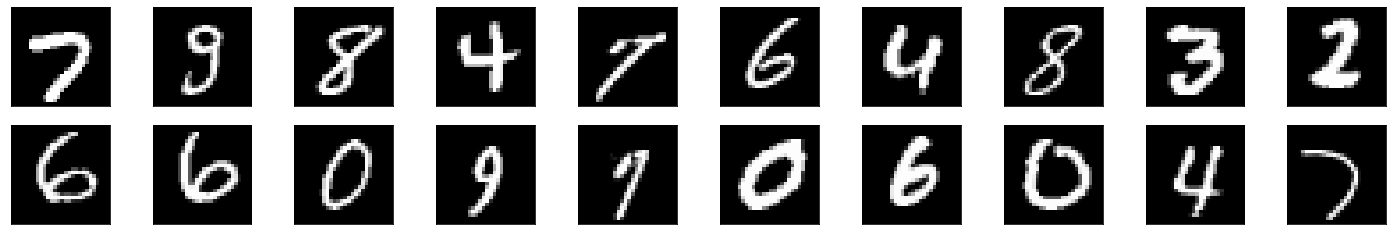

GroundTruth:      7     9     8     4     7     6     4     8     3     2     6     6     0     9     7     0     6     0     4     7


In [9]:
# Visualizes the batch of images
fig = plt.figure(figsize=(25, 4))
for i in np.arange(20):
    ax = fig.add_subplot(2, 20/2, i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[i]), cmap='gray')

plt.show()

print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(20)))

In [10]:
# Inspect shape/pixel of an image in the batch
images[0].shape

(1, 28, 28)

## Step 2: Define a ANN 

In [11]:
# Import libraries for torch
import torch.nn as nn
import torch.nn.functional as F

In [12]:
# Build architecture

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        hidden_1 = 256
        hidden_2 = 256
        self.fc1 = nn.Linear(28 * 28, hidden_1)
        self.fc2 = nn.Linear(hidden_1, hidden_2)
        self.fc3 = nn.Linear(hidden_2, 10)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        # flatten image input
        x = x.view(-1, 28 * 28)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        # add dropout layer
        x = self.dropout(x)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc2(x))
        # add dropout layer
        x = self.dropout(x)
        # add output layer
        x = self.fc3(x)
        
        return x

# initialize the NN
model = Net()
print(model)

   

Net(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)


## Step 3 : Define a Loss Function and Optimizer




In [14]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

n_epochs = 10
valid_loss_min = np.Inf 

## Step 4: Train the Network

In [17]:
for epoch in range(n_epochs):  # loop over the dataset multiple times

  train_loss = 0.0
  valid_loss = 0.0

  for data, target in trainloader:
      optimizer.zero_grad()
      output = model(data)
      loss = criterion(output, target)
      loss.backward()
      optimizer.step()
      train_loss += loss.item() * data.size(0)


  for data, target in validloader:
      output = model(data)
      loss = criterion(output, target)
      valid_loss += loss.item() * data.size(0)

  train_loss = train_loss / len(trainloader.sampler)
  valid_loss = valid_loss / len(validloader.sampler)

  print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
    epoch + 1,
    train_loss,
    valid_loss
  ))

Epoch: 1 	Training Loss: 0.401114 	Validation Loss: 0.293468
Epoch: 2 	Training Loss: 0.246041 	Validation Loss: 0.212601
Epoch: 3 	Training Loss: 0.209287 	Validation Loss: 0.183337
Epoch: 4 	Training Loss: 0.196138 	Validation Loss: 0.185543
Epoch: 5 	Training Loss: 0.184148 	Validation Loss: 0.152180
Epoch: 6 	Training Loss: 0.167993 	Validation Loss: 0.171279
Epoch: 7 	Training Loss: 0.166618 	Validation Loss: 0.170890
Epoch: 8 	Training Loss: 0.160129 	Validation Loss: 0.161648
Epoch: 9 	Training Loss: 0.153673 	Validation Loss: 0.129797
Epoch: 10 	Training Loss: 0.152826 	Validation Loss: 0.131792


## Step 5: Save Model

In [18]:
PATH = './minst_net.pth'
torch.save(model.state_dict(), PATH)

## Step 6: Test Model on Test Set

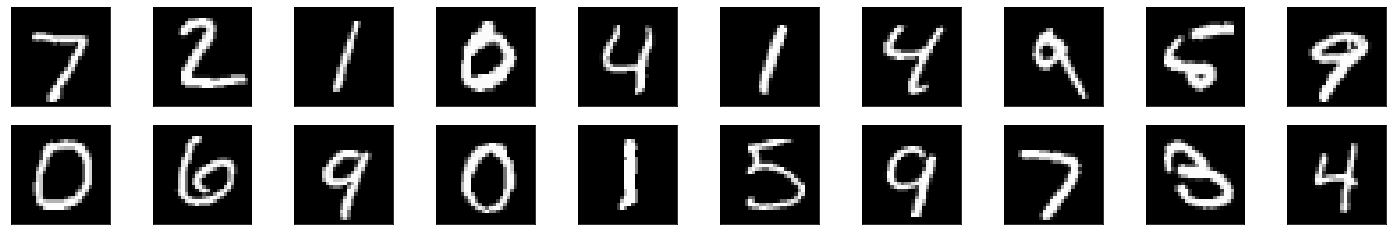

GroundTruth:      7     2     1     0     4     1     4     9     5     9     0     6     9     0     1     5     9     7     3     4


In [20]:
# Display random Image
#We then simply, obtain one batch of images for training using iter.
dataiter = iter(testloader)
images, labels = dataiter.next()
images = images.numpy()



fig = plt.figure(figsize=(25, 4))
for i in np.arange(20):
    ax = fig.add_subplot(2, 20/2, i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[i]), cmap='gray')

plt.show()

classes = ('0','1','2','3','4','5','6','7','8','9')
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(20)))

In [28]:
# Let us look at how the network performs on the whole dataset.
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))


Accuracy of the network on the 10000 test images: 95 %


## Step 7: Investigating Model Performance

In [29]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of     0 : 97 %
Accuracy of     1 : 98 %
Accuracy of     2 : 97 %
Accuracy of     3 : 92 %
Accuracy of     4 : 95 %
Accuracy of     5 : 92 %
Accuracy of     6 : 95 %
Accuracy of     7 : 92 %
Accuracy of     8 : 94 %
Accuracy of     9 : 91 %


In [30]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cpu
